<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%205%3A%20Neural%20Networks%20and%20Deep%20Learning/5_4_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks and Deep Learning**
## Convolutional Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In this problem we are going to use CIFAR 10 dataset. In the dataset there are 60000 32*32 colored images with 10 classes. More information about the data set can be found in the [CIFAR10 Homepage](https://www.cs.toronto.edu/~kriz/cifar.html). Dataset consists of following categories

|Output Label| Category|
|------------|---------|
|0|airplane|
|1|automobile|
|2|bird|
|3|cat|
|4|deer|
|5|dog|
|6|frog|
|7|horse|
|8|ship|
|9|truck|

First lets load the data from keras api

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


Lets look at the shape of training and testing datasets and define the class names

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
category = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Few examples of the images are shown below

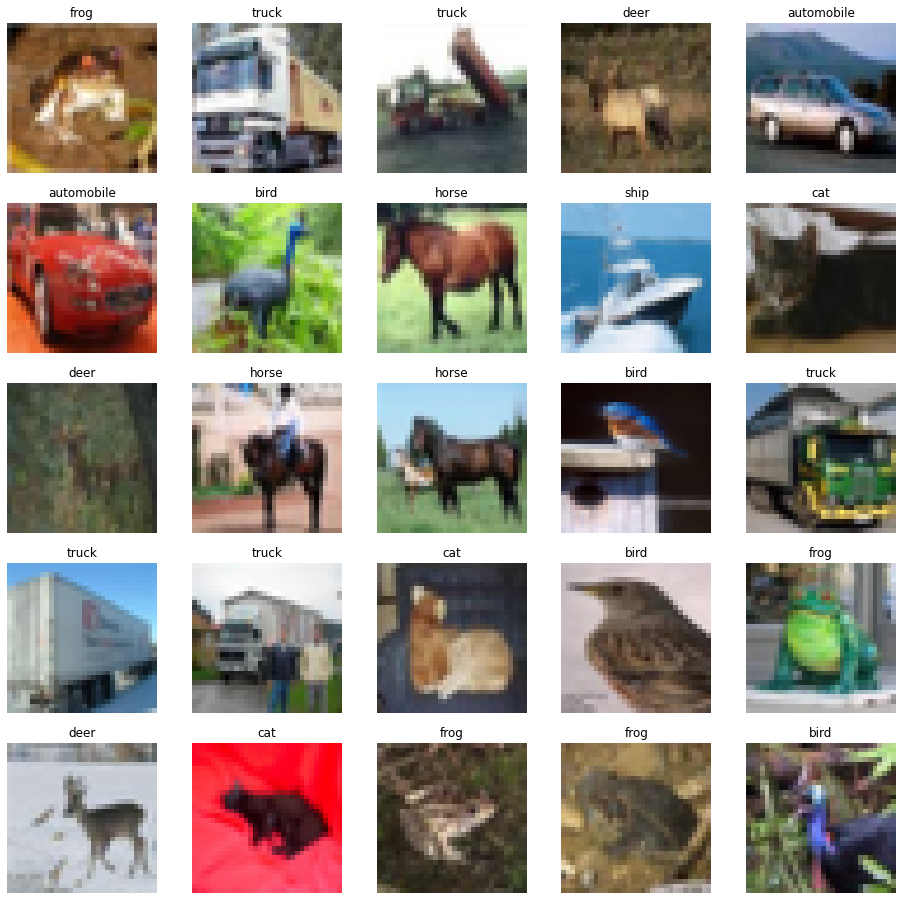

In [4]:
plt.figure(figsize=(16,16))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title(category[y_train[i,0]])

Next we need to normalize the data before training the model

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Convolutional neural network model is constructed using two convolutional layers followed by MaxPool layer. Then a dense layer is used to connect flattened features produced by convolutional layers to target variables.

In [6]:
mdl = tf.keras.Sequential()
mdl.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation="relu", input_shape = x_train.shape[1:]))
mdl.add(tf.keras.layers.MaxPooling2D())
mdl.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu"))
mdl.add(tf.keras.layers.MaxPooling2D())
mdl.add(tf.keras.layers.Flatten())
mdl.add(tf.keras.layers.Dense(64, activation="relu"))
mdl.add(tf.keras.layers.Dense(10, activation="softmax"))

mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

In [7]:
mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
mdl.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 7ms/step - loss: 1.5354 - accuracy: 0.4409
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1926 - accuracy: 0.5777
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0525 - accuracy: 0.6325
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9669 - accuracy: 0.6617
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9070 - accuracy: 0.6821
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8572 - accuracy: 0.7013
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8144 - accuracy: 0.7139
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7785 - accuracy: 0.7263
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7444 - accuracy: 0.7388
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

We can evaluate the model using test data

In [8]:
mdl.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9193 - accuracy: 0.6867


[0.9193339943885803, 0.6866999864578247]

We can also make prediction using predict function

In [9]:
ypred = mdl.predict(x_test)

for i in range(5):
    print("True label: ", category[y_test[i,0]], "\tPredicted label: ", category[np.argmax(ypred[i,:])])

True label:  cat 	Predicted label:  cat
True label:  ship 	Predicted label:  ship
True label:  ship 	Predicted label:  ship
True label:  airplane 	Predicted label:  airplane
True label:  frog 	Predicted label:  frog


We can also extract pseudo probabilities about the prediction

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

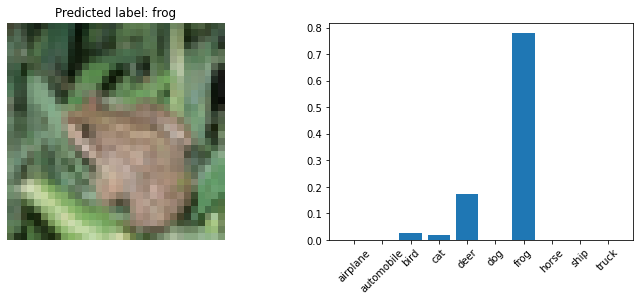

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(x_test[4])
plt.axis("off")
plt.title("Predicted label: " + category[np.argmax(ypred[4,:])])
plt.subplot(1,2,2)
plt.bar(category, ypred[4,:])
plt.xticks(rotation=45)